# FFT of a Moving Target

---
Aim: To show how a moving radar target causes a Doppler frequency shift in the received signal, and how that shift appears as a displacement of the spectral peak when you take an FFT.
(A stationary target gives one frequency spike. A moving target shifts that spike by the Doppler frequency f_D)

$$
f_D = \frac{2 v_r f_c}{c}
$$

So, measuring \( f_D \) tells us the traget velocity \(v_r​\).

we know that The baseband signal for a stationary target is given by  
$$
x(t) = e^{j(2\pi f_0 t + \phi)}
$$
for a moving target: shifted frequency \(f_0 + f_D\)

$$
x(t) = e^{j(2\pi (f_0 + f_D)t + \phi)}
$$

---



Doppler shift fD = 2000.00 Hz


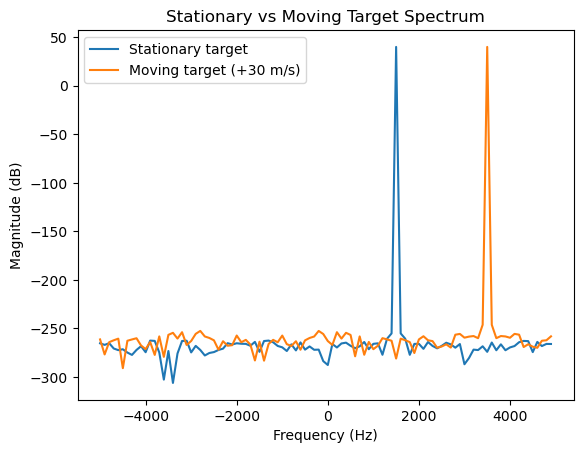

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Radar parameters
c = 3e8              # speed of light (m/s)
fc = 10e9            # radar carrier frequency (Hz)
vr = 30.0            # target radial velocity (m/s)

# Doppler shift (Hz)
fD = 2 * vr * fc / c
print(f"Doppler shift fD = {fD:.2f} Hz")

# Signal parameters
fs = 10000.0   # sampling rate (Hz)
T = 0.01       # duration (s)
f0 = 1500.0    # baseband tone frequency (Hz)
phi = np.deg2rad(20)

# Time and signal
t = np.arange(0, T, 1/fs)
x_stationary = np.exp(1j*(2*np.pi*f0*t + phi))
x_moving = np.exp(1j*(2*np.pi*(f0 + fD)*t + phi))

# FFT
N = len(t)
freq = np.fft.fftfreq(N, d=1/fs)
X_stationary = np.fft.fft(x_stationary, n=N)
X_moving = np.fft.fft(x_moving, n=N)

# Plot
plt.figure()
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(20*np.log10(np.abs(X_stationary))), label='Stationary target')
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(20*np.log10(np.abs(X_moving))), label='Moving target (+30 m/s)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Stationary vs Moving Target Spectrum')
plt.legend()
plt.show()